In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import lec3_graphs as gfx

In [89]:
df = pd.read_csv('qog_std_cs_jan18.csv')

In [90]:
df.head()

ccode        cname ccodealp  ccodecow  ccodewb        version  aid_cpnc  \
0      4  Afghanistan      AFG     700.0      4.0  QoGStdCSJan18       NaN   
1      8      Albania      ALB     339.0      8.0  QoGStdCSJan18       NaN   
2     12      Algeria      DZA     615.0     12.0  QoGStdCSJan18       NaN   
3     20      Andorra      AND     232.0     20.0  QoGStdCSJan18       NaN   
4     24       Angola      AGO     540.0     24.0  QoGStdCSJan18       NaN   

   aid_cpsc  aid_crnc  aid_crnio  ...  wvs_relacc  wvs_relsch  wvs_relsci  \
0       NaN      29.0       13.0  ...         NaN         NaN         NaN   
1       NaN      26.0       13.0  ...         NaN         NaN         NaN   
2       NaN      21.0        6.0  ...    3.710616    1.704692    3.681347   
3       NaN       NaN        NaN  ...         NaN         NaN         NaN   
4       NaN      22.0       13.0  ...         NaN         NaN         NaN   

   wvs_satfin  wvs_satlif  wvs_screl  wvs_subh  wvs_survself  wvs_tradrat  \
0         NaN         NaN        NaN       NaN           NaN          NaN   
1         NaN         NaN        NaN       NaN           NaN          NaN   
2    5.988125    6.301029   5.339371  3.805579     -0.409807    -0.498164   
3         NaN         NaN        NaN       NaN           NaN          NaN   
4         NaN         NaN        NaN       NaN           NaN          NaN   

   wvs_trust  
0        NaN  
1        NaN  
2   0.179286  
3        NaN  
4        NaN  

[5 rows x 1882 columns]

### Desafío 1

In [91]:
#Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
seed = 4855

In [92]:
#Seleccione el 50% de los casos.
df2 = df.sample(frac=.5,random_state=seed)
df2.shape

(97, 1882)

In [93]:
#Cada base generada debe contener los siguientes elementos:
#El índice de desarrollo humano ( undp_hdi ) 
#El nombre del país ( ccodealp )
#La región a la que pertenece ( ht_region ) 
#El PIB per capita. ( gle_cgdpc )
#El total de la población ( imf_pop )
df3 = df2.loc[:,['cname', 'undp_hdi', 'ccodealp', 'ht_region', 'gle_cgdpc', 'imf_pop', 'wef_imort', 'who_alc2000', 'who_tobt', 'wdi_exph']]

In [94]:
valor_numerico = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
label = ['EastEurope', 'LatAm', 'NorthAfrica','SubSaharian',
         'WesternDem', 'EastAsia','SouthEastAsia','SouthAsia',
         'Pacific', 'Caribbean']
df3['ht_region_desc'] = pd.Series.replace(df3['ht_region'],valor_numerico,label)
df3.head()

cname  undp_hdi ccodealp  ht_region   gle_cgdpc    imf_pop  wef_imort  \
3    Andorra     0.857      AND          5  32367.3300        NaN        NaN   
79      Iraq     0.649      IRQ          3   4178.2598  32.577999        NaN   
181  Ukraine     0.748      UKR          1   9326.7197  42.759998   9.200000   
177   Turkey     0.764      TUR          3  16900.7110  77.695999  12.200000   
115  Morocco     0.645      MAR          3   3999.5601  33.179001  26.799999   

     who_alc2000   who_tobt  wdi_exph ht_region_desc  
3       9.979999  33.099998  8.127135     WesternDem  
79      0.170000        NaN  5.538873    NorthAfrica  
181     8.060000  30.700001  7.095736     EastEurope  
177     1.450000  27.000000  5.414959    NorthAfrica  
115     0.430000  22.000000  5.907778    NorthAfrica

### Desafío 2

#### Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos contínuos

In [115]:
for i in df3:
    print(df3[i].describe())

count        97
unique       97
top       Japan
freq          1
Name: cname, dtype: object
count    92.000000
mean      0.714674
std       0.149597
min       0.347000
25%       0.634000
50%       0.749500
75%       0.826500
max       0.948000
Name: undp_hdi, dtype: float64
count      97
unique     97
top       MEX
freq        1
Name: ccodealp, dtype: object
count    97.000000
mean      4.443299
std       2.684714
min       1.000000
25%       2.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: ht_region, dtype: float64
count        96.000000
mean      15926.989690
std       19487.077241
min         332.269990
25%        3270.867425
50%        9501.599600
75%       20650.589000
max      108481.130000
Name: gle_cgdpc, dtype: float64
count     71.000000
mean      32.552535
std       58.194380
min        0.011000
25%        2.035000
50%        8.132000
75%       36.757000
max      318.789001
Name: imf_pop, dtype: float64
count     73.000000
mean      19.551158
std       

### Desafío 3

#### Genere una función que liste las observaciones perdidas de una variable

In [123]:
def obs_perdidas(df, var, print_list=False):
    p1 = df[var].isnull().sum()
    p2 = df[var].isnull().sum()/len(df)
    if print_list is True:
        p3 = df[df[var].isnull()==True]['cname']
        print(p3)
    return p1,p2
    

#### Analice todas las variables y sus casos perdidos.

In [124]:
for i in df3:
    nulos, p_nulos = obs_perdidas(df3, i)
    print(f"La cantidad de casos perdidos de {i} es de {nulos} lo que equivale a {round(p_nulos,3)}")

La cantidad de casos perdidos de cname es de 0 lo que equivale a 0.0
La cantidad de casos perdidos de undp_hdi es de 5 lo que equivale a 0.052
La cantidad de casos perdidos de ccodealp es de 0 lo que equivale a 0.0
La cantidad de casos perdidos de ht_region es de 0 lo que equivale a 0.0
La cantidad de casos perdidos de gle_cgdpc es de 1 lo que equivale a 0.01
La cantidad de casos perdidos de imf_pop es de 26 lo que equivale a 0.268
La cantidad de casos perdidos de wef_imort es de 24 lo que equivale a 0.247
La cantidad de casos perdidos de who_alc2000 es de 9 lo que equivale a 0.093
La cantidad de casos perdidos de who_tobt es de 39 lo que equivale a 0.402
La cantidad de casos perdidos de wdi_exph es de 3 lo que equivale a 0.031
La cantidad de casos perdidos de ht_region_desc es de 0 lo que equivale a 0.0


#### Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos

Para este caso, las variables que pressentan una mayor de casos perdidos son **who_tobt**, **imf_pop** y **wef_imort**

In [160]:
#who_tobt
obs_perdidas(df3, 'who_tobt', True)

79                         Iraq
190                   Venezuela
91                       Kuwait
63                       Gambia
133            Papua New Guinea
111                      Monaco
192                       Yemen
124                   Nicaragua
130                       Palau
99                Liechtenstein
179                      Tuvalu
69                    Guatemala
105                    Maldives
52                  El Salvador
5           Antigua and Barbuda
0                   Afghanistan
145          St Kitts and Nevis
26                      Burundi
32     Central African Republic
16                       Bhutan
55                      Eritrea
175        United Arab Emirates
17                      Bolivia
169                       Syria
68                      Grenada
10                      Bahamas
102                  Madagascar
163                 South Sudan
139               Guinea-Bissau
182                   Macedonia
45               Cyprus (1975-)
159     

(39, 0.4020618556701031)

In [129]:
#imf_pop
obs_perdidas(df3, 'imf_pop', True)

3                       Andorra
190                   Venezuela
63                       Gambia
73                     Honduras
111                      Monaco
192                       Yemen
99                Liechtenstein
69                    Guatemala
52                  El Salvador
50           Dominican Republic
5           Antigua and Barbuda
36                        China
145          St Kitts and Nevis
26                      Burundi
32     Central African Republic
55                      Eritrea
175        United Arab Emirates
169                       Syria
68                      Grenada
44                         Cuba
102                  Madagascar
163                 South Sudan
139               Guinea-Bissau
72                        Haiti
159                     Somalia
176                     Tunisia
Name: cname, dtype: object


(26, 0.26804123711340205)

In [130]:
#wef_imort
obs_perdidas(df3, 'wef_imort', True)

3                       Andorra
79                         Iraq
57                         Fiji
66                     Kiribati
133            Papua New Guinea
111                      Monaco
130                       Palau
99                Liechtenstein
179                      Tuvalu
105                    Maldives
5           Antigua and Barbuda
0                   Afghanistan
145          St Kitts and Nevis
32     Central African Republic
55                      Eritrea
191                       Samoa
68                      Grenada
10                      Bahamas
44                         Cuba
163                 South Sudan
139               Guinea-Bissau
159                     Somalia
146                    St Lucia
148                  San Marino
Name: cname, dtype: object


(24, 0.24742268041237114)

### Desafío 4

#### Genere una función que grafique un histograma en conjunto y señale las medias.

In [155]:
def graph_hist(sample_df, var, true_mean, sample_mean=False):
    plt.hist(sample_df[var], color='grey', alpha=.4)
    if sample_mean==True:
        plt.axvline(sample_df[var].mean(),color='tomato',linestyle='--',lw=2)
    if true_mean==True:
        plt.axvline(df[var].mean(),color='royalblue',linestyle='--',lw=2)
    plt.title(f"Distribución de la variable {var}")

#### Implemente las funciones para las 4 variables seleccionadas según su grupo.

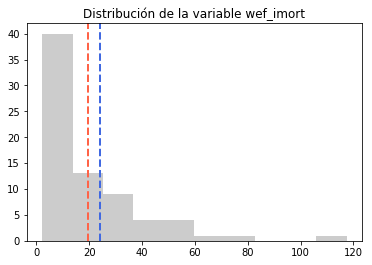

In [156]:
#wef_imort
graph_hist(df3, 'wef_imort', True, True)

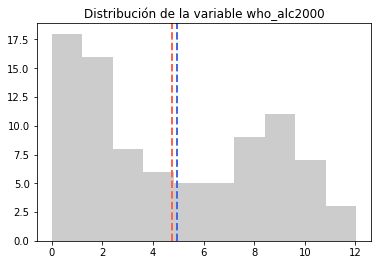

In [157]:
#who_alc2000
graph_hist(df3, 'who_alc2000', True, True)

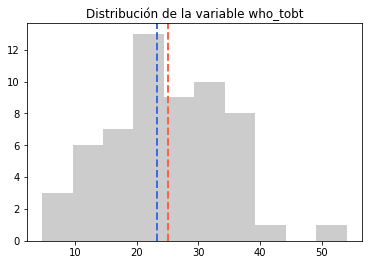

In [158]:
#who_tobt
graph_hist(df3, 'who_tobt', True, True)

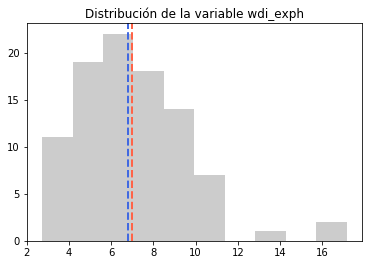

In [159]:
#wdi_exph
graph_hist(df3, 'wdi_exph', True, True)

#### ¿En qué variables la media de la submuestra es mayor a la de la muestra completa?

En este caso, la media de la submuestra es mayor a la muestra completa en **who_tobt** (Current smoking of any tobacco product (Total)) y **wdi_exph** (Government expenditure on health, total (% of GDP))

### Desafío 5

#### Genere una función que devuelva un dotplot

In [183]:
def graph_dot(sample_df, plot_var, plot_by, global_stat=False, statistic='mean'):
    group_mean = sample_df.groupby(plot_by)[plot_var].mean()
    group_median = sample_df.groupby(plot_by)[plot_var].median()
    
    plt.xlabel(plot_var)
    plt.ylabel(plot_by)
    
    if statistic=='mean':
        print("La media de la muestra es {}".format(round(sample_df[plot_var].mean(),3)))
        plt.plot(group_mean.values, group_mean.index, 'o', color = 'skyblue')
        plt.axvline(sample_df[plot_var].mean(), color = 'tomato', linestyle = '--')
    elif statistic=='median':
        print("La mediana de la muestra es {}".format(round(sample_df[plot_var].median(),3)))
        plt.plot(group_median.values, group_median.index, 'o', color = 'darkseagreen')
        plt.axvline(sample_df[plot_var].median(), color = 'blue', linestyle = '--')
    
    if global_stat:
        print("La media de la base completa es {}".format(round(df[plot_var].mean(),3)))
        plt.axvline(df[plot_var].mean(), color = 'green', linestyle = '--')

In [184]:
# 3 variables con menor cantidad de casos perdidos: gle_cgdpc, wdi_exph y undp_hdi

La media de la muestra es 15926.99
La media de la base completa es 14279.041


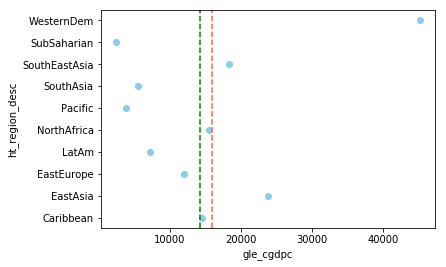

In [185]:
graph_dot(df3, 'gle_cgdpc', 'ht_region_desc', True, 'mean')

La mediana de la muestra es 9501.6
La media de la base completa es 14279.041


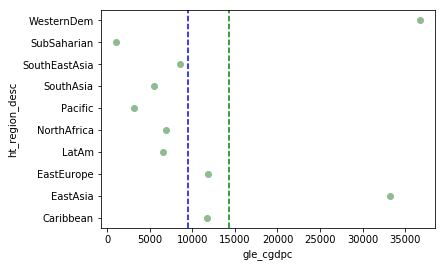

In [186]:
graph_dot(df3, 'gle_cgdpc', 'ht_region_desc', True, 'median')

La media de la muestra es 6.995
La media de la base completa es 6.784


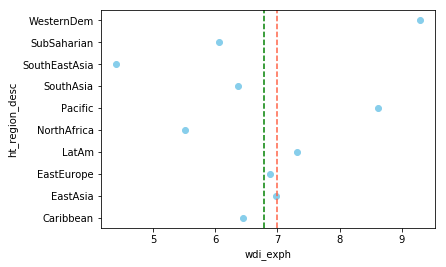

In [187]:
graph_dot(df3, 'wdi_exph', 'ht_region_desc', True, 'mean')

La mediana de la muestra es 6.48
La media de la base completa es 6.784


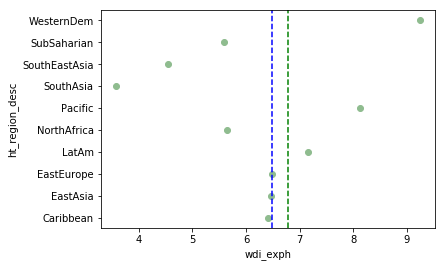

In [188]:
graph_dot(df3, 'wdi_exph', 'ht_region_desc', True, 'median')

La media de la muestra es 0.715
La media de la base completa es 0.696


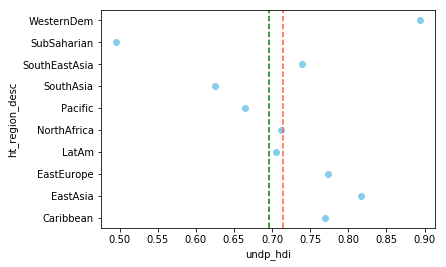

In [189]:
graph_dot(df3, 'undp_hdi', 'ht_region_desc', True, 'mean')

La mediana de la muestra es 0.75
La media de la base completa es 0.696


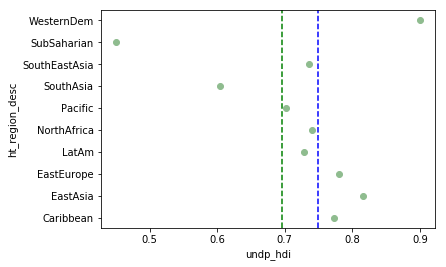

In [190]:
graph_dot(df3, 'undp_hdi', 'ht_region_desc', True, 'median')

### Desafío 6

In [191]:
df3.head()

cname  undp_hdi ccodealp  ht_region   gle_cgdpc    imf_pop  wef_imort  \
3    Andorra     0.857      AND          5  32367.3300        NaN        NaN   
79      Iraq     0.649      IRQ          3   4178.2598  32.577999        NaN   
181  Ukraine     0.748      UKR          1   9326.7197  42.759998   9.200000   
177   Turkey     0.764      TUR          3  16900.7110  77.695999  12.200000   
115  Morocco     0.645      MAR          3   3999.5601  33.179001  26.799999   

     who_alc2000   who_tobt  wdi_exph ht_region_desc  
3       9.979999  33.099998  8.127135     WesternDem  
79      0.170000        NaN  5.538873    NorthAfrica  
181     8.060000  30.700001  7.095736     EastEurope  
177     1.450000  27.000000  5.414959    NorthAfrica  
115     0.430000  22.000000  5.907778    NorthAfrica

In [192]:
df3.to_csv('subsample_hz_demo.csv')